In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [36]:
#Read in data

In [37]:
df = pd.read_csv("heart_attack_prediction.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [38]:
#Rename columns

In [39]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [40]:
df= df.rename(columns={"cp":"chest pain","trestbps":"resting bp","fbs":"fasting blood sugar","restecg":"resting ekg","thalach":"max hr","exang":"exercise induced angina","oldpeak":"ST depres. by exercise relative to rest","slope":"slope of the peak exercise ST","ca":"# major vessels","thal":"drop this","num       ":"diagnosis"})
df

,age,sex,chest pain,resting bp,chol,fasting blood sugar,resting ekg,max hr,exercise induced angina,ST depres. by exercise relative to rest,slope of the peak exercise ST,# major vessels,drop this,diagnosis
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [41]:
#Check basic stats

In [42]:
df.describe()

,age,sex,chest pain,ST depres. by exercise relative to rest,diagnosis
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      294 non-null    int64  
 1   sex                                      294 non-null    int64  
 2   chest pain                               294 non-null    int64  
 3   resting bp                               294 non-null    object 
 4   chol                                     294 non-null    object 
 5   fasting blood sugar                      294 non-null    object 
 6   resting ekg                              294 non-null    object 
 7   max hr                                   294 non-null    object 
 8   exercise induced angina                  294 non-null    object 
 9   ST depres. by exercise relative to rest  294 non-null    float64
 10  slope of the peak exercise ST            294 non-n

In [44]:
df.shape

(294, 14)

In [45]:
#Clean up data (null values, dtype,etc)

In [47]:
df.replace("?",pd.NA, inplace=True)
df.isnull().sum()

age                                          0
sex                                          0
chest pain                                   0
resting bp                                   1
chol                                        23
fasting blood sugar                          8
resting ekg                                  1
max hr                                       1
exercise induced angina                      1
ST depres. by exercise relative to rest      0
slope of the peak exercise ST              190
# major vessels                            291
drop this                                  266
diagnosis                                    0
dtype: int64

In [54]:
df =df.drop(["slope of the peak exercise ST","# major vessels","drop this"], axis=1)

In [55]:
df

,age,sex,chest pain,resting bp,chol,fasting blood sugar,resting ekg,max hr,exercise induced angina,ST depres. by exercise relative to rest,diagnosis
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,<NA>,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [56]:
df.isnull().sum()

age                                         0
sex                                         0
chest pain                                  0
resting bp                                  1
chol                                       23
fasting blood sugar                         8
resting ekg                                 1
max hr                                      1
exercise induced angina                     1
ST depres. by exercise relative to rest     0
diagnosis                                   0
dtype: int64

In [57]:
df=df.dropna()

In [59]:
df.isnull().sum()

age                                        0
sex                                        0
chest pain                                 0
resting bp                                 0
chol                                       0
fasting blood sugar                        0
resting ekg                                0
max hr                                     0
exercise induced angina                    0
ST depres. by exercise relative to rest    0
diagnosis                                  0
dtype: int64

In [60]:
df.dtypes

age                                          int64
sex                                          int64
chest pain                                   int64
resting bp                                  object
chol                                        object
fasting blood sugar                         object
resting ekg                                 object
max hr                                      object
exercise induced angina                     object
ST depres. by exercise relative to rest    float64
diagnosis                                    int64
dtype: object

In [61]:
df['resting bp'] = df['resting bp'].astype('int64')
df['chol'] = df['chol'].astype('int64')
df['fasting blood sugar'] = df['fasting blood sugar'].astype('int64')
df['resting ekg'] = df['resting ekg'].astype('int64')
df['max hr'] = df['max hr'].astype('int64')
df['exercise induced angina'] = df['exercise induced angina'].astype('int64')

C:\Users\laure\AppData\Local\Temp\ipykernel_29916\1835564054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resting bp'] = df['resting bp'].astype('int64')
C:\Users\laure\AppData\Local\Temp\ipykernel_29916\1835564054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol'] = df['chol'].astype('int64')
C:\Users\laure\AppData\Local\Temp\ipykernel_29916\1835564054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [62]:
df.dtypes

age                                          int64
sex                                          int64
chest pain                                   int64
resting bp                                   int64
chol                                         int64
fasting blood sugar                          int64
resting ekg                                  int64
max hr                                       int64
exercise induced angina                      int64
ST depres. by exercise relative to rest    float64
diagnosis                                    int64
dtype: object

In [63]:
#correlation map
correlation_matrix = df.corr()
correlation_matrix

,age,sex,chest pain,resting bp,chol,fasting blood sugar,resting ekg,max hr,exercise induced angina,ST depres. by exercise relative to rest,diagnosis
age,1.000000,0.020133,0.142592,0.257889,0.096937,0.198526,0.052657,-0.460095,0.264962,0.208633,0.160249
sex,0.020133,1.000000,0.217588,0.094937,0.055653,0.067651,-0.081372,-0.073062,0.129519,0.120925,0.249531
chest pain,0.142592,0.217588,1.000000,0.079504,0.161049,0.044556,0.006512,-0.390128,0.481323,0.360063,0.503254
resting bp,0.257889,0.094937,0.079504,1.000000,0.116890,0.115005,0.022250,-0.220708,0.231742,0.229117,0.148295
chol,0.096937,0.055653,0.161049,0.116890,1.000000,0.124957,0.056886,-0.136292,0.172802,0.113572,0.217929
fasting blood sugar,0.198526,0.067651,0.044556,0.115005,0.124957,1.000000,0.022119,-0.082902,0.125333,0.069241,0.178642
resting ekg,0.052657,-0.081372,0.006512,0.022250,0.056886,0.022119,1.000000,-0.011117,0.056668,0.023457,-0.019413
max hr,-0.460095,-0.073062,-0.390128,-0.220708,-0.136292,-0.082902,-0.011117,1.000000,-0.425644,-0.327207,-0.345074
exercise induced angina,0.264962,0.129519,0.481323,0.231742,0.172802,0.125333,0.056668,-0.425644,1.000000,0.641122,0.557860
ST depres. by exercise relative to rest,0.208633,0.120925,0.360063,0.229117,0.113572,0.069241,0.023457,-0.327207,0.641122,1.000000,0.565669


<Axes: >

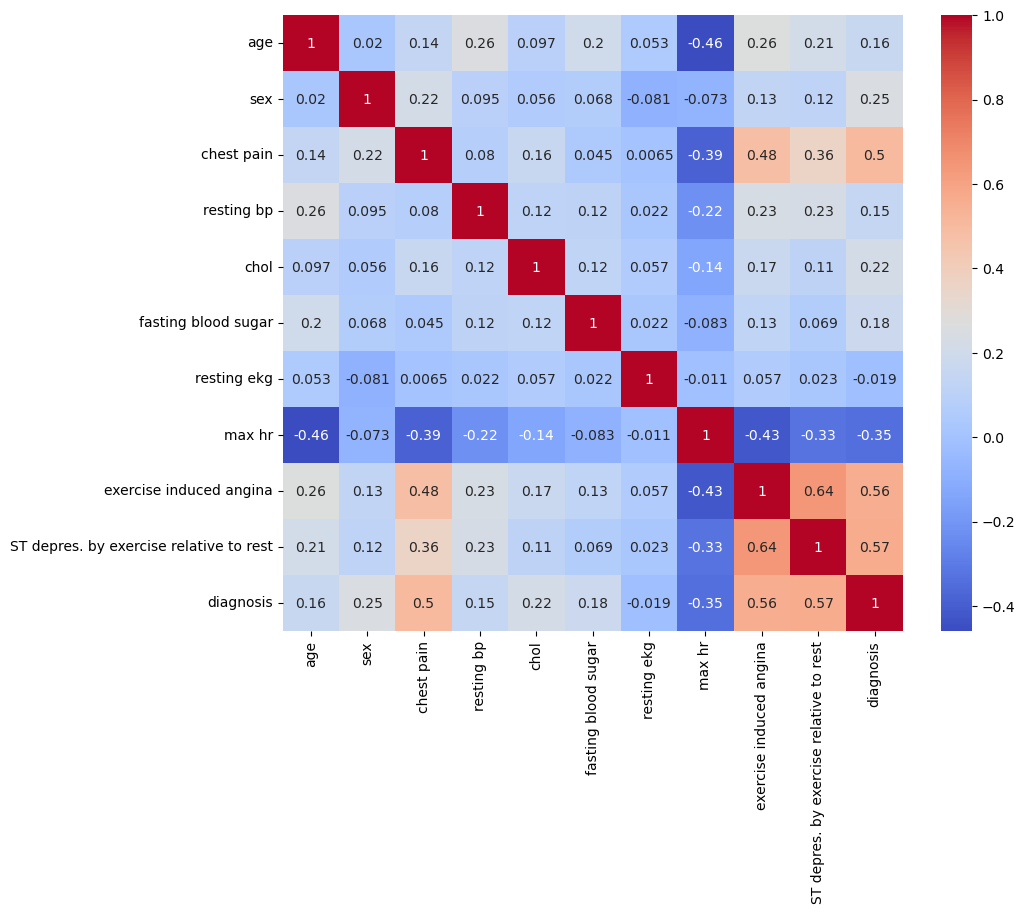

In [64]:
plt.figure(figsize= (10,8))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm")

In [65]:
#basic graphs

Text(0.5, 1.0, 'Age distribution of heart disease')

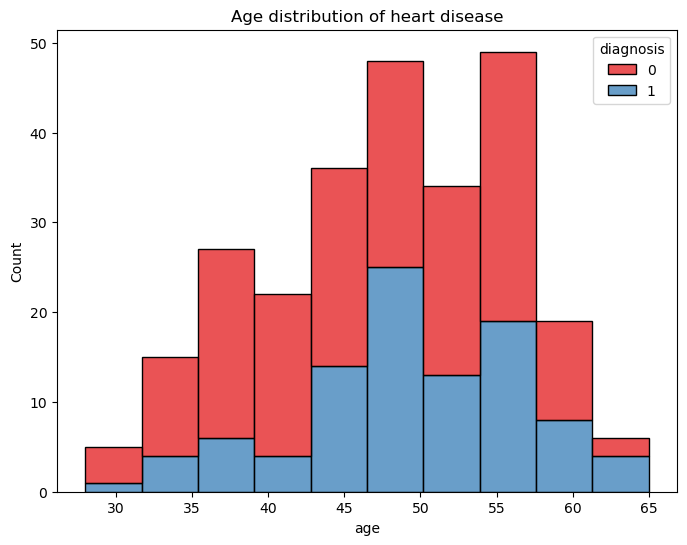

In [126]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="age",hue="diagnosis",multiple="stack",palette="Set1")
plt.title("Age distribution of heart disease")

C:\Users\laure\AppData\Local\Temp\ipykernel_29916\774549898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="diagnosis",palette="Set2")


Text(0.5, 1.0, 'Heart disease presence, 0= No heart disease, 1= Yes heart disease')

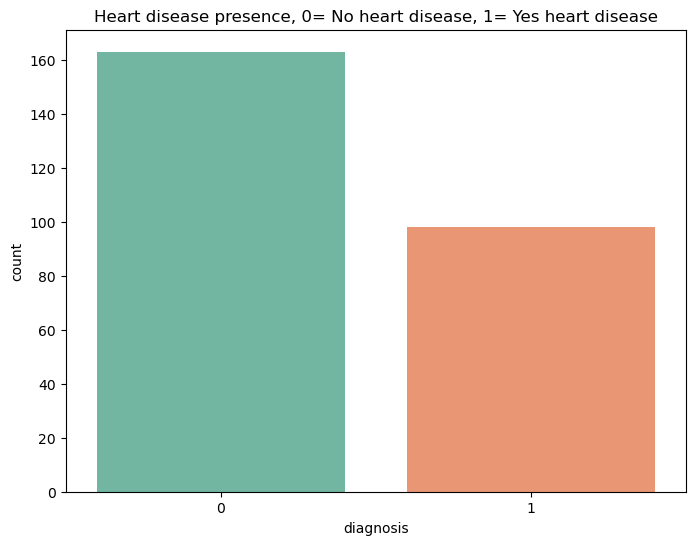

In [127]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="diagnosis",palette="Set2")
plt.title("Heart disease presence, 0= No heart disease, 1= Yes heart disease")

Text(0.5, 1.0, 'Sex differentation of presence of heart disease, 0= female,1= male')

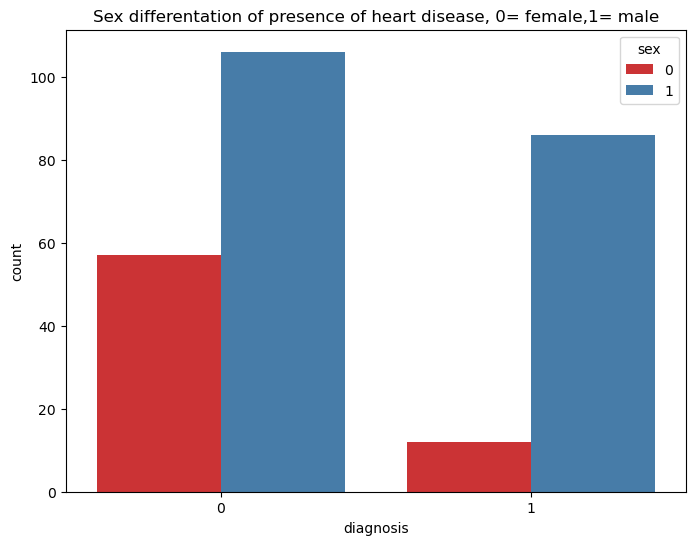

In [128]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="diagnosis",hue="sex", palette="Set1")
plt.title("Sex differentation of presence of heart disease, 0= female,1= male")

In [69]:
#Machine Learning

In [93]:
X=df.drop("diagnosis", axis=1)
y=df["diagnosis"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [95]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [96]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost": AdaBoostClassifier()
}

In [97]:
for x in range(len(list(models))):
    model=list(models.values())[x]
    model.fit(X_train,y_train)
    
    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test,y_test_prediction))
    print("Classification score: ", classification_report(y_test, y_test_prediction))

Accuracy:  0.6981132075471698
Classification score:                precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.59      0.65      0.62        20

    accuracy                           0.70        53
   macro avg       0.68      0.69      0.68        53
weighted avg       0.71      0.70      0.70        53

Accuracy:  0.7735849056603774
Classification score:                precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.70      0.70      0.70        20

    accuracy                           0.77        53
   macro avg       0.76      0.76      0.76        53
weighted avg       0.77      0.77      0.77        53

Accuracy:  0.8301886792452831
Classification score:                precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.79      0.75      0.77        20

    accuracy           

In [98]:
#Adaboost is best model

In [99]:
#build pipeline with relevent info ()

In [100]:
df.head()

,age,sex,chest pain,resting bp,chol,fasting blood sugar,resting ekg,max hr,exercise induced angina,ST depres. by exercise relative to rest,diagnosis
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [139]:
new_patient_info = {
    "age":50,
    "sex": 0,
    "chest pain":0,
    "resting bp":75,
    "chol": 125,
    "fasting blood sugar":0,
    "resting ekg":0,
    "max hr":200,
    "exercise induced angina": 0,
    "ST depres. by exercise relative to rest": 0,
}

In [140]:
patient_df = pd.DataFrame([new_patient_info])


In [141]:
adaboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier())
])


adaboost_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('adaboost', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'


In [142]:
prediction = adaboost_pipeline.predict(patient_df)
probability = adaboost_pipeline.predict_proba(patient_df)
print("Prediction: ",prediction[0],",if 0 no heart disease if 1 heart disease predicted")
print("Probability of prediction: ", probability[0])

Prediction:  0 ,if 0 no heart disease if 1 heart disease predicted
Probability of prediction:  [0.76492637 0.23507363]
